In [1]:
# load libraries:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import os

In [2]:
#read mask: 
print('reading weight file')
print("Reading in weight map for OuterRim/Mira Titan")
hpmap_weight = hp.fitsfunc.read_map('../../FullSky_weight.fits', field=0,nest=False, partial=False, hdu=1, h=False, verbose=True, memmap=True)
#
# masking - not really necessary here, but just in case it is useful for something else.
unmask = np.where(hpmap_weight > 0)[0]
#----------
#hp.mollview(hpmap_weight, nest=False)
#plt.show()
#----------



reading weight file
Reading in weight map for OuterRim/Mira Titan


/tmp/ipykernel_323512/727607760.py:4: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  hpmap_weight = hp.fitsfunc.read_map('../../FullSky_weight.fits', field=0,nest=False, partial=False, hdu=1, h=False, verbose=True, memmap=True)


loading delta map:
Working on file /global/cfs/cdirs/lsst/groups/CS/mass_sheets/density_map_127_dens.bin
Got RING-ordered input map


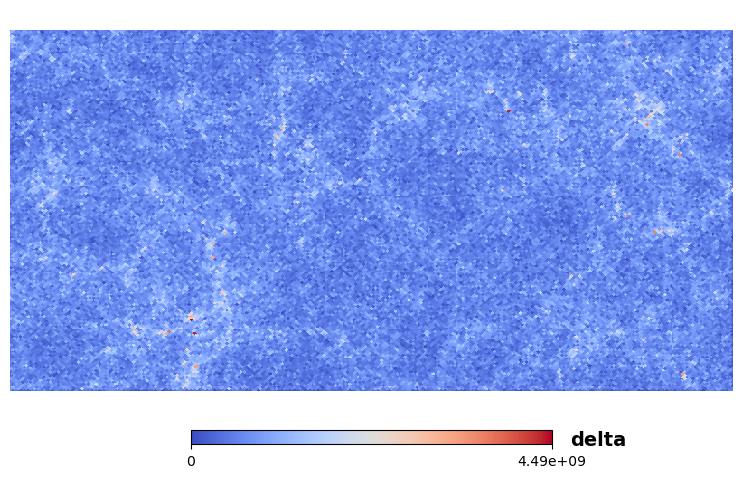

/tmp/ipykernel_323512/3368637922.py:46: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  density_smoothed = hp.sphtfunc.smoothing(hpmap_density, sigma=smooth_rad, beam_window=None, pol=False, iter=3, lmax=5000, mmax=None, use_weights=False, use_pixel_weights=False, datapath=None, verbose=True, nest=False)


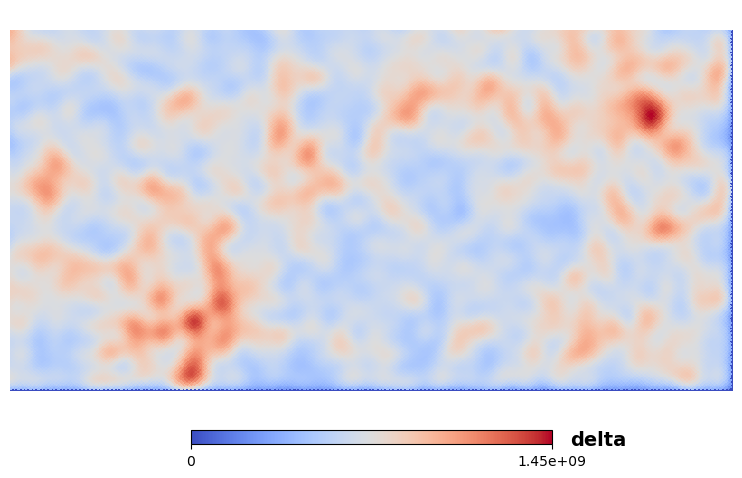

/tmp/ipykernel_323512/3368637922.py:63: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  fname = '../../density/density_'+np.str(snaplist[plane])+'_smooth_1arcmin.npy'


AttributeError: module 'numpy' has no attribute 'str'.
`np.str` was a deprecated alias for the builtin `str`. To avoid this error in existing code, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [5]:
#loop over mass sheets:
zfile=np.loadtxt("z2ts.txt",delimiter=',')
snaplist = np.flip(zfile[1:58,1]).astype(int)
z_list=np.flip(zfile[1:58,0])
n_slices = np.size(z_list)

for plane in range(2,3):
#for plane in range(0,n_slices):
    
    path_in="/global/cfs/cdirs/lsst/groups/CS/mass_sheets/"
    print("loading delta map:")
    fname = path_in+'density_map_'+str(snaplist[plane])+'_dens.bin'
    print('Working on file '+fname)
    tmp = np.fromfile(fname,'<f')

    # Format is nested, order into ring in order to use alm2maps transforms
    # and degrade NSIDE 
    #print("NSIDE_orig=", hp.get_nside(tmp))
    #binmap=hp.pixelfunc.ud_grade(tmp, 4096, pess=False, order_in='NESTED', order_out='RING', power=None, dtype=None)
    #print("NSIDE_new=", hp.get_nside(binmap))

    # Or reorder, keeping all full NSIDE resolution
    hpmap_density = hp.reorder(tmp, n2r = True)
    del tmp

    print("Got RING-ordered input map")

    #Visualise
    lonra = [0, 2]
    latra = [0, 1]
    hp.cartview(hpmap_density,
        cbar=True, lonra=lonra, latra=latra,
        nest=False,
        title=" ",
        # min=-10, max=0,
        cmap=plt.cm.coolwarm,
        norm=None, unit='delta')
    plt.show()

    #smooth
    smooth_arcmin = 1.0
    #smooth_arcmin = 0.5
    #smooth_arcmin = 0.1
    smooth_rad = smooth_arcmin/60*np.pi/180.0

    density_smoothed = hp.sphtfunc.smoothing(hpmap_density, sigma=smooth_rad, beam_window=None, pol=False, iter=3, lmax=5000, mmax=None, use_weights=False, use_pixel_weights=False, datapath=None, verbose=True, nest=False)
    
    #re-apply mask
    density_smoothed *= hpmap_weight
    #visualise
    lonra = [0, 2]
    latra = [0, 1]
    hp.cartview(density_smoothed,
        cbar=True, lonra=lonra, latra=latra,
        nest=False,
        title=" ",
        # min=-10, max=0,
        cmap=plt.cm.coolwarm,
        norm=None, unit='delta')
    plt.show()

    #write to file:
    fname = '../../density/density_'+str(snaplist[plane])+'_smooth_1arcmin.npy'
    #fname = '../../density/density_'+np.str(snaplist[plane])+'_smooth_05arcmin.npy'
    #fname = '../../density/density_'+np.str(snaplist[plane])+'_smooth_01arcmin.npy'
    np.save(fname,density_smoothed)


In [6]:
fname = '../../density/density_'+str(snaplist[plane])+'_smooth_1arcmin.npy'
#fname = '../../density/density_'+np.str(snaplist[plane])+'_smooth_05arcmin.npy'
#fname = '../../density/density_'+np.str(snaplist[plane])+'_smooth_01arcmin.npy'
np.save(fname,density_smoothed)


In [4]:
zfile=np.loadtxt("z2ts.txt",delimiter=',')
snaplist = np.flip(zfile[1:58,1]).astype(int)
z_list=np.flip(zfile[1:58,0])
n_slices = np.size(z_list)

#for plane in range(3,n_slices):
for plane in range(2,3):
    
    path_in="/global/cfs/cdirs/lsst/groups/CS/mass_sheets/"
    print("loading delta map:")
    fname = path_in+'density_map_'+str(snaplist[plane])+'_dens.bin'
    print('Working on file '+fname)

loading delta map:
Working on file /global/cfs/cdirs/lsst/groups/CS/mass_sheets/density_map_127_dens.bin
